In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import datetime

plt.style.use('fivethirtyeight')

In [2]:
sector_data = pd.read_csv (r'DataForClustering_Classification.csv')
sector_data

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Target_FR12Mts,Class
0,2/1/2008,20.982941,22.15,36.250000,4.77,31.320000,37.610001,27.129999,133.820007,10.27,-0.45,1
1,1/1/2008,23.671812,23.25,37.000000,5.03,32.580002,39.220001,27.200001,137.369995,10.30,-0.40,1
2,3/1/2008,20.203087,22.40,37.400002,4.58,30.719999,37.939999,27.860001,131.970001,10.26,-0.40,1
3,11/1/2007,25.182777,26.26,39.400002,5.34,34.650002,42.730000,29.190001,148.660004,10.17,-0.39,1
4,12/1/2007,23.501219,26.66,39.160000,5.15,32.700001,42.330002,28.799999,146.210007,10.16,-0.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
236,3/1/2003,16.864338,14.30,19.309999,4.34,22.730000,18.400000,18.570000,84.739998,10.38,0.33,0
237,2/1/2003,17.099918,14.52,19.180000,4.27,22.240000,17.700001,18.670000,84.900002,10.44,0.35,0
238,4/1/2009,8.716491,17.25,21.760000,2.27,23.290001,25.850000,22.000000,87.419998,10.10,0.36,0
239,3/1/2009,7.156783,15.62,18.430000,2.05,19.650000,25.549999,21.100000,79.519997,10.10,0.47,0


In [3]:
dataset = sector_data.drop(['Date','Target_FR12Mts'],axis=1)
dataset

,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Class
0,20.982941,22.15,36.250000,4.77,31.320000,37.610001,27.129999,133.820007,10.27,1
1,23.671812,23.25,37.000000,5.03,32.580002,39.220001,27.200001,137.369995,10.30,1
2,20.203087,22.40,37.400002,4.58,30.719999,37.939999,27.860001,131.970001,10.26,1
3,25.182777,26.26,39.400002,5.34,34.650002,42.730000,29.190001,148.660004,10.17,1
4,23.501219,26.66,39.160000,5.15,32.700001,42.330002,28.799999,146.210007,10.16,1
...,...,...,...,...,...,...,...,...,...,...
236,16.864338,14.30,19.309999,4.34,22.730000,18.400000,18.570000,84.739998,10.38,0
237,17.099918,14.52,19.180000,4.27,22.240000,17.700001,18.670000,84.900002,10.44,0
238,8.716491,17.25,21.760000,2.27,23.290001,25.850000,22.000000,87.419998,10.10,0
239,7.156783,15.62,18.430000,2.05,19.650000,25.549999,21.100000,79.519997,10.10,0


In [4]:
dataset1 = dataset.drop(['Class'],axis=1)
corrMatrix = dataset1.corr()
corrMatrix

,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX
XLF,1.000000,0.340871,0.368769,0.495649,0.317827,0.320451,0.176300,0.423476,-0.358095
XLK,0.340871,1.000000,0.818686,-0.114189,0.804717,0.741973,0.768081,0.896315,0.162684
XLI,0.368769,0.818686,1.000000,-0.406335,0.977597,0.940201,0.952151,0.983219,0.473555
HY,0.495649,-0.114189,-0.406335,1.000000,-0.466917,-0.397575,-0.530487,-0.303502,-0.670512
XLY,0.317827,0.804717,0.977597,-0.466917,1.000000,0.891749,0.961094,0.967940,0.530667
XLU,0.320451,0.741973,0.940201,-0.397575,0.891749,1.000000,0.918899,0.921545,0.457920
XLP,0.176300,0.768081,0.952151,-0.530487,0.961094,0.918899,1.000000,0.935211,0.624367
SPY,0.423476,0.896315,0.983219,-0.303502,0.967940,0.921545,0.935211,1.000000,0.385167
VBMFX,-0.358095,0.162684,0.473555,-0.670512,0.530667,0.457920,0.624367,0.385167,1.000000


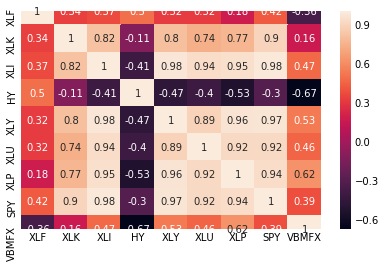

In [5]:
import seaborn as sn
sn.heatmap(corrMatrix, annot=True)

In [6]:
X = dataset.drop('Class', 1)
y = dataset['Class']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
explained_variance = pca.explained_variance_ratio_

In [11]:
explained_variance

array([6.67514848e-01, 2.25877237e-01, 4.77843774e-02, 3.41860149e-02,
       1.67602446e-02, 3.90803258e-03, 2.78839343e-03, 1.07244485e-03,
       1.08407197e-04])

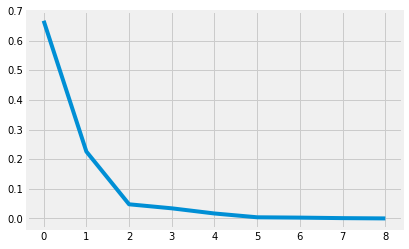

In [12]:
from pylab import *
plot(explained_variance)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Aalok Devkota\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[49  9]
 [ 6  9]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        58
           1       0.50      0.60      0.55        15

    accuracy                           0.79        73
   macro avg       0.70      0.72      0.71        73
weighted avg       0.81      0.79      0.80        73



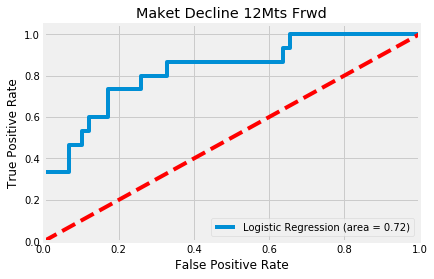

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Maket Decline 12Mts Frwd')
plt.legend(loc="lower right")

plt.show()